In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
import sounddevice as sd 
%matplotlib inline  

In [35]:
#Load Data
music=np.loadtxt('music.txt')
corrupted_speech=np.loadtxt('corrupted_speech.txt')
fs=np.loadtxt('fs.txt')
m=music.size
N=corrupted_speech.size
ERLE=[]
print (num_music)

280223


In [15]:
#caculate ERLE for M from 5 to 100
for M in range(5,101,5):
    u=0.2
    step=0.1
    Input=np.zeros((M,m-M+1))
    Disire=np.zeros((M,N-M+1))
    for i in range(0,m-M):
            temp_m= music[i:i+M]
            Input[:, i]= temp_m[::-1]
            temp_cd= corrupted_speech[i:i+M]
            Disire[:, i]= temp_cd[::-1]
            for k in range(0,M-1):
                if i==0 or k==0:
                    continue
                else:
                    Input[k,i]=(1-u)*Input[k,i-1]+u*Input[k-1,i-1]
    w=np.zeros((M,m-M+1)) 
    w_curr=np.zeros((M,m-M+1))
    y=np.zeros((1,m-M+1)) 
    error=np.zeros((1,m-M+1))
    for _ in range(20):
        for i in range(0,m-M):
            y[0, i]=w[:,i].T@Input[:,i]
            error[0,i]=Disire[0,i]-y[0,i]
            w[:,i+1]=w[:,i]+2*step*error[0,i]*Input[:,i]/(Input[:,i].T@Input[:,i])
            w_curr[:,i]=w[:,i+1]
            w[:,i]=w_curr[:,i]
        J=1/(2*(m-M+1))*error**2
        D=Disire[0,:]**2
        E=error[0,:]**2
        d=np.sum(D)
        e=np.sum(E)
    ERLE.append(10*math.log10(d/e))
    print(M)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


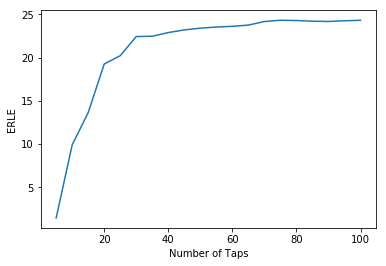

In [31]:
y = np.zeros((1,20))
x = np.arange(5,101,5)
y=ERLE[10:30]
plt.plot(x,y)
plt.xlabel('Number of Taps')
plt.ylabel('ERLE')